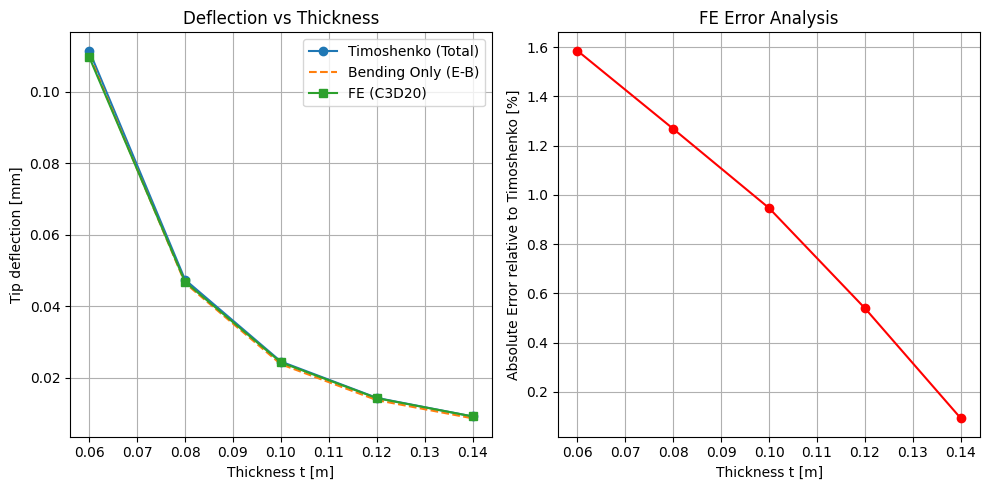

t [m]      u_Timo [mm]     u_FE [mm]       Error [%] 
0.06       0.1115          0.1097          1.59      
0.08       0.0474          0.0468          1.27      
0.10       0.0246          0.0243          0.95      
0.12       0.0144          0.0143          0.54      
0.14       0.0092          0.0092          0.09      


In [6]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Given Parameters
L = 0.5      # Beam length [m]
b = 0.1      # Beam width [m]
E = 210e9    # Young's Modulus [Pa]
nu = 0.3     # Poisson's ratio
F = 1000.0   # Total Tip Force [N]
k = 5/6      # Shear correction factor for rectangular section

# Thicknesses and corresponding FE results from your runs
t = np.array([0.06, 0.08, 0.10, 0.12, 0.14])
u_FE = np.array([1.097000e-04, 4.683000e-05, 2.432000e-05, 1.432000e-05, 9.199000e-06])

# 2. Bending Component (Euler-Bernoulli Term)
I = b * t**3 / 12.0
u_bending = F * L**3 / (3 * E * I)

# 3. Shear Component (Timoshenko Term)
G = E / (2 * (1 + nu))   # Shear Modulus
A = b * t                # Cross-sectional Area
u_shear = F * L / (k * G * A)

# 4. Total Timoshenko Deflection
u_timoshenko = u_bending + u_shear

# 5. Error Analysis (FE vs Timoshenko)
error = (u_timoshenko - u_FE) / u_timoshenko * 100.0

# Plotting Comparison
plt.figure(figsize=(10, 5))

# Plot A: Displacement Comparison
plt.subplot(1, 2, 1)
plt.plot(t, u_timoshenko * 1e3, 'o-', label='Timoshenko (Total)')
plt.plot(t, u_bending * 1e3, '--', label='Bending Only (E-B)')
plt.plot(t, u_FE * 1e3, 's-', label='FE (C3D20)')
plt.xlabel('Thickness t [m]')
plt.ylabel('Tip deflection [mm]')
plt.title('Deflection vs Thickness')
plt.legend()
plt.grid(True)

# Plot B: Error Plot
plt.subplot(1, 2, 2)
plt.plot(t, np.abs(error), 'ro-')
plt.xlabel('Thickness t [m]')
plt.ylabel('Absolute Error relative to Timoshenko [%]')
plt.title('FE Error Analysis')
plt.grid(True)

plt.tight_layout()
plt.savefig('timoshenko_analysis.png')
plt.show()

# Print Table for your notes
print(f"{'t [m]':<10} {'u_Timo [mm]':<15} {'u_FE [mm]':<15} {'Error [%]':<10}")
for i in range(len(t)):
    print(f"{t[i]:<10.2f} {u_timoshenko[i]*1e3:<15.4f} {u_FE[i]*1e3:<15.4f} {error[i]:<10.2f}")